In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1: K-means clustering

In [2]:
from PIL import Image
im = Image.open("download.jpeg")
im.show();

In [3]:
data = np.asanyarray(im)
data.shape

(92, 122, 3)

In [4]:
data_2D = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))

In [5]:
data_2D.shape

(11224, 3)

In [6]:
data_2D

array([[42, 31, 37],
       [34, 23, 29],
       [39, 30, 35],
       ...,
       [12,  8,  9],
       [ 3,  0,  0],
       [ 3,  0,  0]], dtype=uint8)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_2D)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [8]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

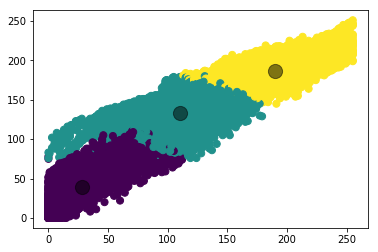

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_2D)
y_kmeans = kmeans.predict(data_2D)

plt.scatter(data_2D[:, 0], data_2D[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


## Part 2: Agglomerative Clustering

In [10]:
df = pd.read_csv('zoo.csv')
df.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
np.unique(df['class_type'])

array([1, 2, 3, 4, 5, 6, 7])

In [13]:
X, y = df.iloc[:, :-1], df.iloc[:,-1]

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(X['animal_name'].values)
X['animal_name'] = le.transform(X['animal_name'])

In [15]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=7).fit(X.values)
y_pred = clustering.labels_
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y_pred = [y_pred[i]+1 for i in range(len(y_pred))]
y_pred;

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y.values, y_pred)

8.772277227722773

## Project: Automotive Domain

In [18]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [20]:
# Check uniqueness
len(np.unique(df['id']))

4000

In [21]:
df = df[['mean_dist_day', 'mean_over_speed_perc']]
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


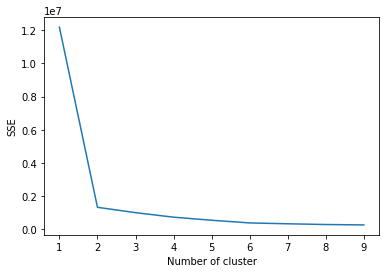

In [22]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

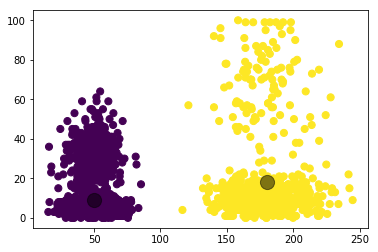

In [23]:
X = df.values
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
